In [25]:
import numpy as np
import matplotlib.pyplot as plt
from discrete_events_simulation import Scenario, simulate #Import your solution from the previous lab.

# Statistical analysis
## Moving mean and variance

In [26]:
def moving_mean_var(new_data, old_mean, old_var, t):
    """ Calculates moving sameple mean and variance at time t.
    
    Keywords:
        new_data (float): new data point arriving at time t.
        old_mean (float): previous sample mean.
        old_var (float): previous sample variance.
        t (int): time index
    
    Returns:
        new_mean (float): updated sample mean.
        new_var (float): updated sample variance.
    """
    if t == 1:
        new_mean = new_data
        new_var = 0
    else:
        new_mean = old_mean + (new_data - old_mean) / t
        new_var = (1 - 1 / (t - 1)) * old_var + t * (new_mean - old_mean)**2
    return new_mean, new_var

## Queue simulation

In [27]:
precision = 0.1
max_queue_mean = 0
max_queue_var = 0
max_queue_all = []
max_queue_mean_all = []
max_queue_var_all = []
t = 0

scenario = Scenario()

while True: 
    t += 1
    
    # Run simulation
    _, queues = simulate(scenario)
    max_queue = max(queues)
    
    # Collect statistics
    max_queue_mean, max_queue_var = moving_mean_var(max_queue, max_queue_mean, max_queue_var, t)
    
    
    max_queue_all.append(max_queue)
    max_queue_mean_all.append(max_queue_mean)
    max_queue_var_all.append(max_queue_var)
    
    # Check if necessary precision reached
    if t >= 100 and np.sqrt(max_queue_var / t) < precision:
        break

Plot the mean maximum queue length and standard deviation

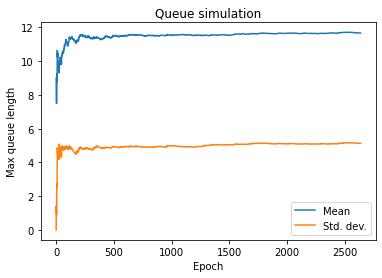

In [28]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

ax.plot(max_queue_mean_all, label='Mean')
ax.plot(np.sqrt(max_queue_var_all), label='Std. dev.')
ax.set(title='Queue simulation',
       xlabel='Epoch',
       ylabel='Max queue length')
ax.legend()
plt.show()

## Bootstrapping

In [29]:
def bootstrap(data, f_statistic, draws):
    """ Calculates the bootstrap mse of a statistic of choice
    
    Keywords:
        data (array): data array.
        f_statistic: function handle calculating the statistic of interest.
        draws (int): number of bootstrap draws.
    
    Returns:
        mse (float): mean square error of the statistic of interest.
    """
    theta = f_statistic(data)
    se = np.zeros((draws, ))
    for r in np.arange(draws):
        data_draw = np.random.choice(data, size=data.shape[0], replace=True)
        theta_emp = f_statistic(data_draw)
        se[r] = (theta_emp -  theta)**2
    mse = se.mean()
    return mse

In [30]:
max_queue_all = np.array(max_queue_all)

### Mean

In [31]:
f_mean = lambda data: data.mean()
emp_mean = f_mean(max_queue_all)
emp_mean

11.66388783630163

In [32]:
bootstrap_mean = bootstrap(max_queue_all, f_mean, 1000)
bootstrap_mean

0.009337051092274463

### 95th Percentile

In [33]:
f_p95 = lambda data: np.quantile(data, q=0.95)
emp_p95 = f_p95(max_queue_all)
emp_p95

22.0

In [34]:
bootstrap_p95 = bootstrap(max_queue_all, f_p95, 1000)
bootstrap_p95

0.37055000000000554

### Worst case

In [35]:
f_max = lambda data: np.max(data)
emp_max = f_max(max_queue_all)
emp_max

35

In [36]:
bootstrap_max = bootstrap(max_queue_all, f_max, 1000)
bootstrap_max

0.233

#### Plot simulated maximum queue lengths and bootstrapped statistics

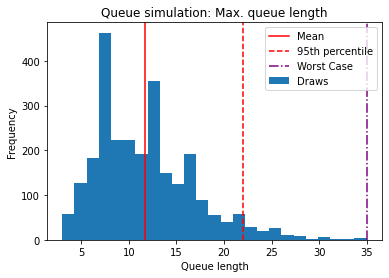

In [37]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

num_bins = 25
n, bins, patches = ax.hist(max_queue_all, num_bins, density=0, label='Draws')
ax.axvline(emp_mean, label='Mean', color='r')
ax.axvline(emp_p95, label='95th percentile', color='r', linestyle='--')
ax.axvline(emp_max, label='Worst Case', color='purple', linestyle='-.')
ax.set(title='Queue simulation: Max. queue length',
       xlabel= 'Queue length',
       ylabel='Frequency')
ax.legend()
plt.show()